## Visualize Cell Health Predictions on Repurposing Hub Data

**Gregory Way, 2019**

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

## Load and Process Data

In [2]:
# Load Data
data_dir <- file.path("data", "repurposing_transformed")
real_file <- file.path(data_dir, "repurposing_umap_transformed_cell_painting.tsv.gz")

cp_embedding_df <- readr::read_tsv(real_file, col_types = readr::cols())

cell_health_file <- file.path(data_dir, "repurposing_transformed_real_models.tsv.gz")
cell_health_df <- readr::read_tsv(cell_health_file, col_types = readr::cols()) 

# Merge data together
cp_embedding_df <- cp_embedding_df %>%
    dplyr::bind_cols(cell_health_df)

print(dim(cp_embedding_df))
head(cp_embedding_df, 3)

[1] 9350   76


Metadata_broad_sample  Metadata_mmoles_per_liter umap_x    umap_y   
1 BRD-A00147595-001-01-5 0.0                       -2.951844 0.9939566
2 BRD-A00147595-001-01-5 0.1                       -3.107697 0.3860975
3 BRD-A00147595-001-01-5 0.4                       -2.524060 0.6251085
  Metadata_broad_sample1 Metadata_mmoles_per_liter1 cc_cc_g1_mean
1 BRD-A00147595-001-01-5 0.0                         0.12063406  
2 BRD-A00147595-001-01-5 0.1                        -0.03980260  
3 BRD-A00147595-001-01-5 0.4                         0.01884117  
  cc_mitosis_ph3_neg_n_spots_mean cc_edu_pos_high_n_spots_h2ax_mean
1 0.1783815                       0.1997622                        
2 0.1943891                       0.2254152                        
3 0.2073830                       0.2665627                        
  cc_polyploid_n_spots_mean ⋯ cc_all_nucleus_area_mean cc_cc_n_spots_mean
1 0.2988695                 ⋯ 0.2311629                0.1974630         
2 0.3027778                 ⋯ 0.2979922                0.1968687         
3 0.2512733                 ⋯ 0.2629252                0.1161710         
  vb_ros_back_mean cc_g1_n_objects vb_percent_all_apoptosis
1 -0.23612664      0.4139967       -0.27155267             
2 -0.07821680      0.1828436       -0.06529125             
3 -0.01614199      0.2253924       -0.01727995             
  cc_all_high_n_spots_h2ax_mean cc_all_large_round_polyploid_mean
1 0.2310497                     0.2186928                        
2 0.2262011                     0.5698721                        
3 0.1856053                     0.5158029                        
  cc_edu_pos_n_objects cc_all_n_objects cc_g1_n_spots_per_nucleus_area_mean
1 0.3852050            0.3778692        -0.2145808                         
2 0.1877323            0.1932057        -0.1351521                         
3 0.2264340            0.2188536        -0.1447703

## Visualize Metadata and Cell Health Variables

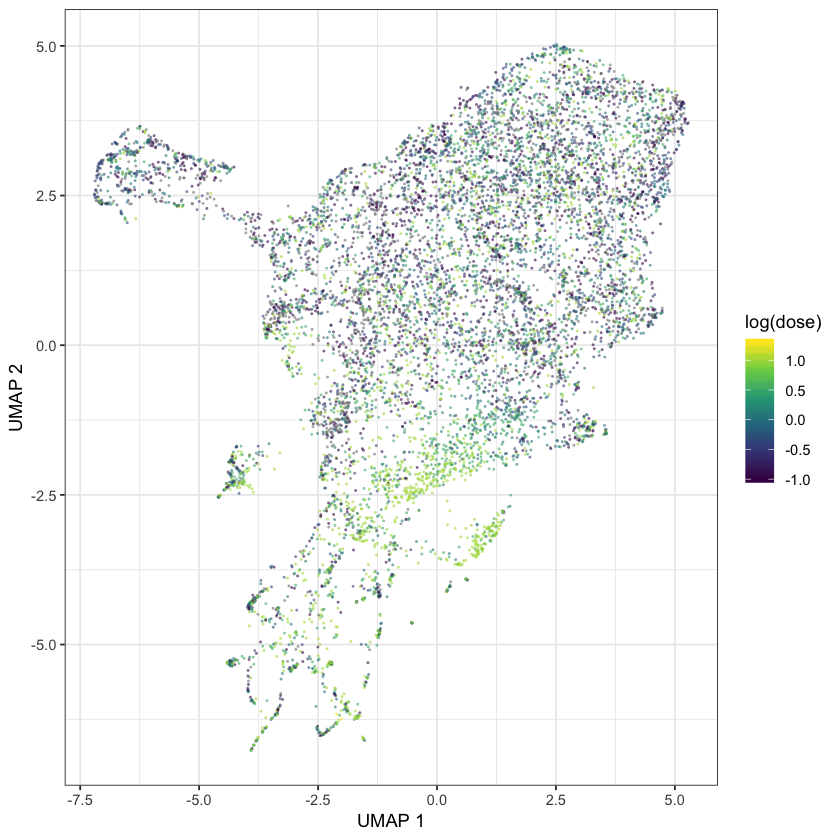

In [3]:
ggplot(cp_embedding_df,
       aes(x = umap_x, y = umap_y)) +
    geom_point(aes(color = log10(Metadata_mmoles_per_liter)),
               size = 0.5,
               pch = 16,
               alpha = 0.6) +
    theme_bw() +
    scale_color_viridis_c(name = "log(dose)") +
    xlab("UMAP 1") +
    ylab("UMAP 2")

output_file <- file.path("figures", "umap_repurposing_cell_painting_dose_consensus.png")
ggsave(output_file, height = 5, width = 6, dpi = 500)

## Certain Models had Better Performance in A549

We applied all models to the Drug Repurposing Set data.

Here, output visualizations of several of the top models.

![Performance Rank](../3.train/figures/ranked_models_A549.png)

In [4]:
visualize_model <- function(target_variable, title, save_figure = TRUE) {
    plot_gg <- ggplot(cp_embedding_df, aes(x = umap_x, y = umap_y)) +
        geom_point(aes_string(color = target_variable),
                   size = 0.5,
                   pch = 16,
                   alpha = 0.6) +
        theme_bw() +
        scale_color_viridis_c(name = title) +
        xlab("UMAP 1") +
        ylab("UMAP 2")
    
    if (save_figure) {
        output_file <- file.path("figures",
                                 paste0("umap_repurposing_cell_painting_",
                                        target_variable,
                                        "_consensus.png"))
        ggsave(output_file, height = 5, width = 6, dpi = 500)
    }
    
    print(plot_gg)
}

In [5]:
# Load feature mapping
mapping_dir <- file.path("..", "1.generate-profiles", "data", "labels")
mapping_file <- file.path(mapping_dir, "feature_mapping_annotated.csv")
map_df <- readr::read_csv(mapping_file,
                          col_types = readr::cols(.default = readr::col_character()))

print(dim(map_df))
head(map_df, 3)

[1] 75  7


original_name updated_name feature_type measurement maria_thumbs_up assay
1 Row           well_row     metadata     NA          NA              NA   
2 Column        well_col     metadata     NA          NA              NA   
3 Plate Name    plate_name   metadata     NA          NA              NA   
  description
1 NA         
2 NA         
3 NA

## Visualizing Compound Dosage

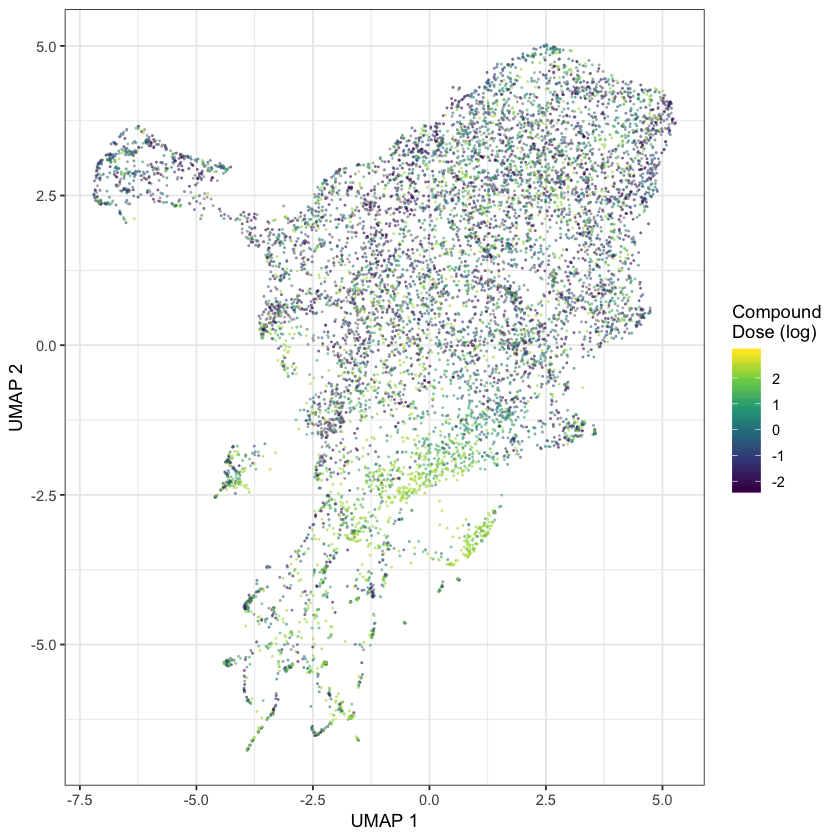

In [6]:
visualize_model(target_variable = "log(Metadata_mmoles_per_liter)",
                title = "Compound\nDose (log)") 

## Predicting Number of Live Cells (DRAQ7)

In [7]:
map_df %>% filter(original_name == "# Live Cells")

original_name updated_name      feature_type measurement maria_thumbs_up
1 # Live Cells  vb_num_live_cells viability    death       1              
  assay description         
1 draq  number of live cells

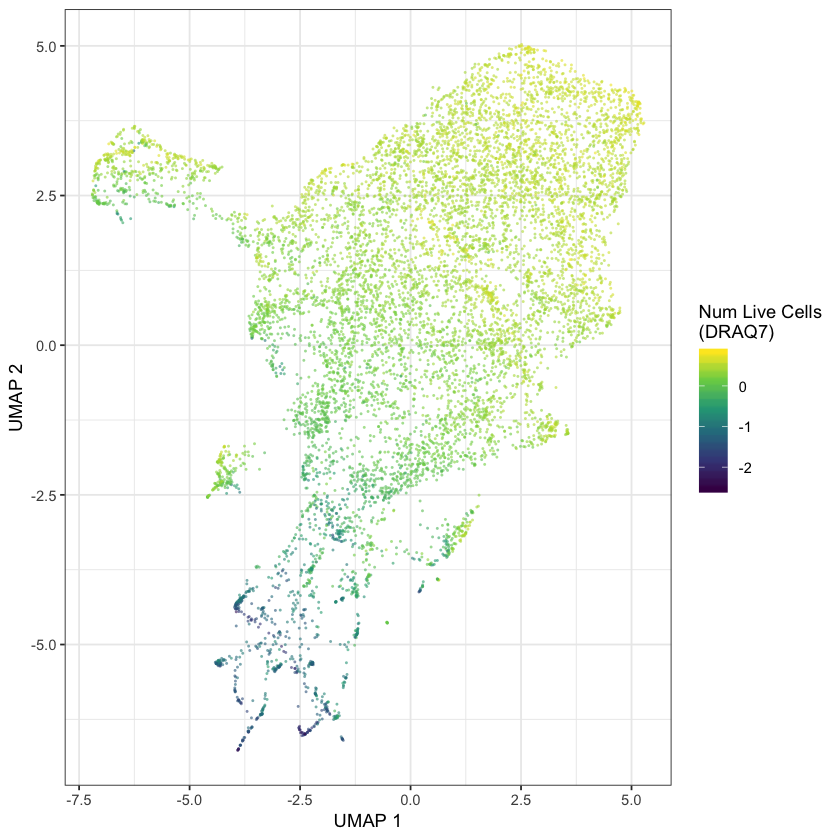

In [8]:
visualize_model(target_variable = "vb_num_live_cells",
                title = "Num Live Cells\n(DRAQ7)")

## Predicting Live Width:Length (DRAQ7)

In [9]:
map_df %>% filter(original_name == "Live Width:Length")

original_name     updated_name              feature_type measurement
1 Live Width:Length vb_live_cell_width_length viability    NA         
  maria_thumbs_up assay description 
1 0               draq  width/length

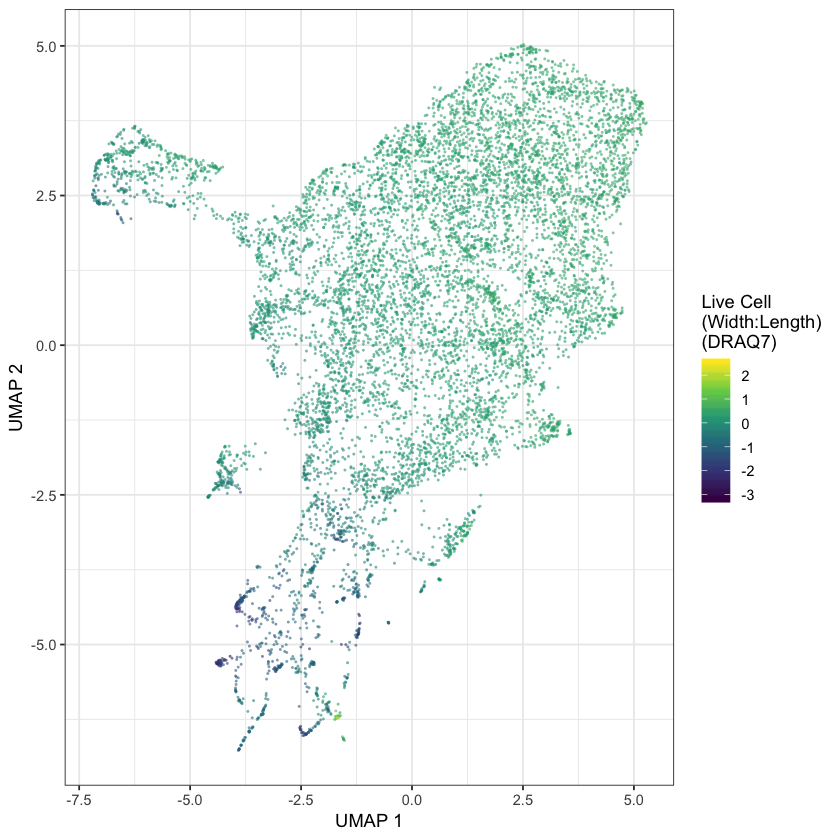

In [10]:
visualize_model(target_variable = "vb_live_cell_width_length",
                title = "Live Cell\n(Width:Length)\n(DRAQ7)")

## Predicting Live Cell Roundness (DRAQ7)

In [11]:
map_df %>% filter(original_name == "Live Cell Roundness")

original_name       updated_name           feature_type measurement
1 Live Cell Roundness vb_live_cell_roundness viability    NA         
  maria_thumbs_up assay description   
1 0               draq  cell roundness

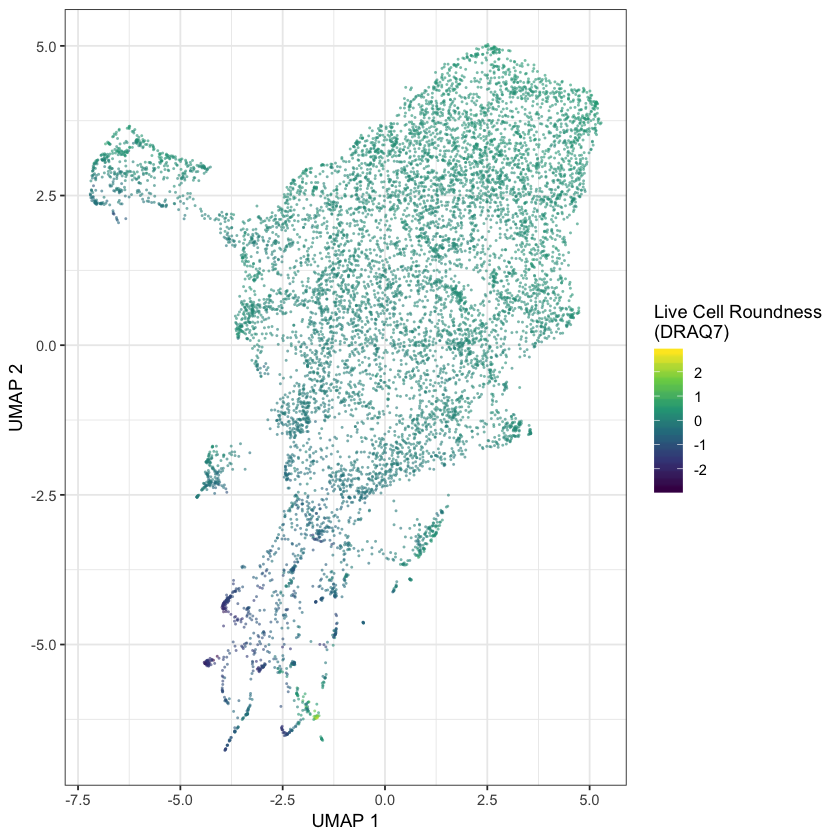

In [12]:
visualize_model(target_variable = "vb_live_cell_roundness",
                title = "Live Cell Roundness\n(DRAQ7)")

## Predicting Number of Objects (Hoechst)

In [13]:
map_df %>% filter(original_name == "ALL - Number of Objects")

original_name           updated_name     feature_type measurement   
1 ALL - Number of Objects cc_all_n_objects cell_cycle   cell_viability
  maria_thumbs_up assay   description          
1 1               hoechst total number of cells

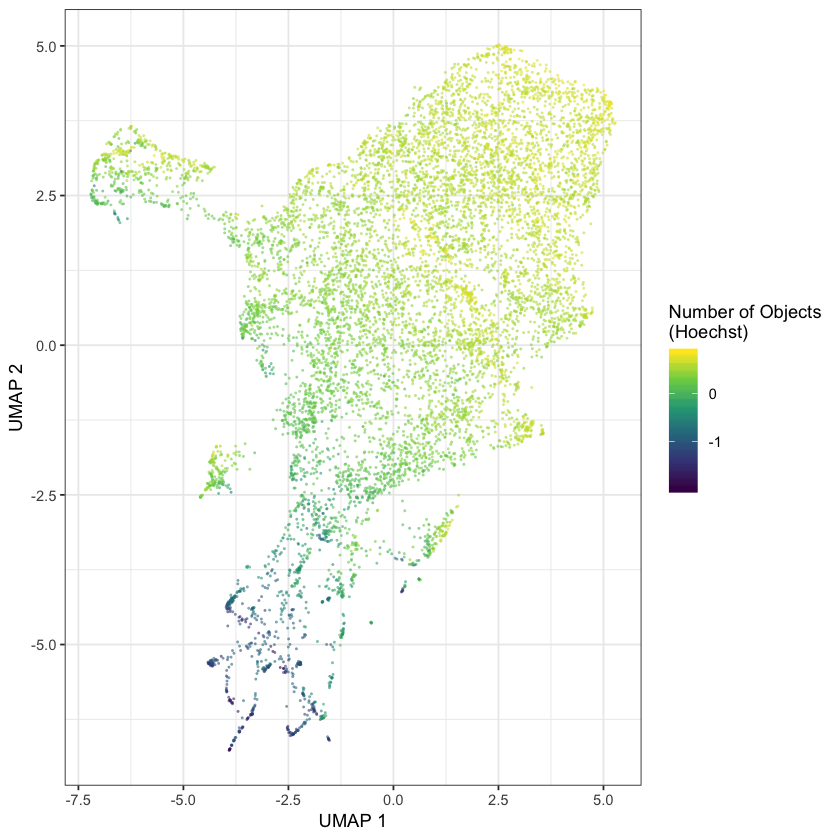

In [14]:
visualize_model(target_variable = "cc_all_n_objects",
                title = "Number of Objects\n(Hoechst)")

## Predicting Live Cell Area (DRAQ7)

In [15]:
map_df %>% filter(original_name == "Live Cell Area")

original_name  updated_name      feature_type measurement maria_thumbs_up
1 Live Cell Area vb_live_cell_area viability    NA          0              
  assay description
1 draq  cell size

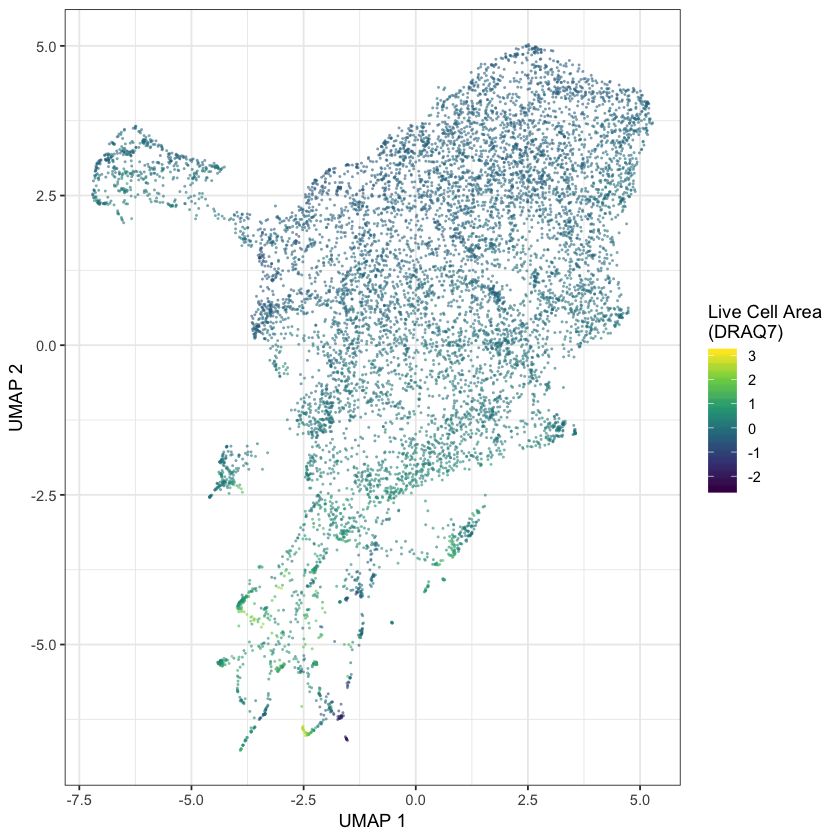

In [16]:
visualize_model(target_variable = "vb_live_cell_area",
                title = "Live Cell Area\n(DRAQ7)")

## Predicting Number of Objects in Cell Cycle Stage (Hoechst)

In [17]:
map_df %>% filter(original_name == "CC - Number of Objects")

original_name          updated_name    feature_type measurement   
1 CC - Number of Objects cc_cc_n_objects cell_cycle   cell_viability
  maria_thumbs_up assay   description                            
1 0               hoechst Number of cells selected for cell cycle

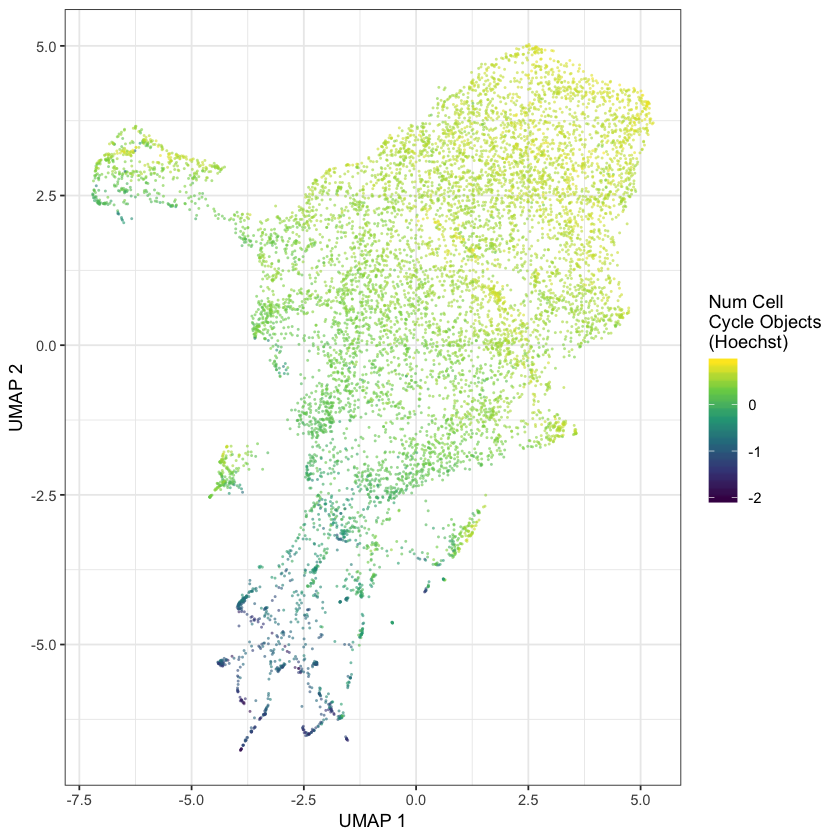

In [18]:
visualize_model(target_variable = "cc_cc_n_objects",
                title = "Num Cell\nCycle Objects\n(Hoechst)")

## Predicting Number of Objects in G1 (Many Dyes)

In [19]:
map_df %>% filter(original_name == "G1 - Number of Objects")

original_name          updated_name    feature_type measurement
1 G1 - Number of Objects cc_g1_n_objects cell_cycle   NA         
  maria_thumbs_up assay           description       
1 0               many_cell_cycle number of G1 cells

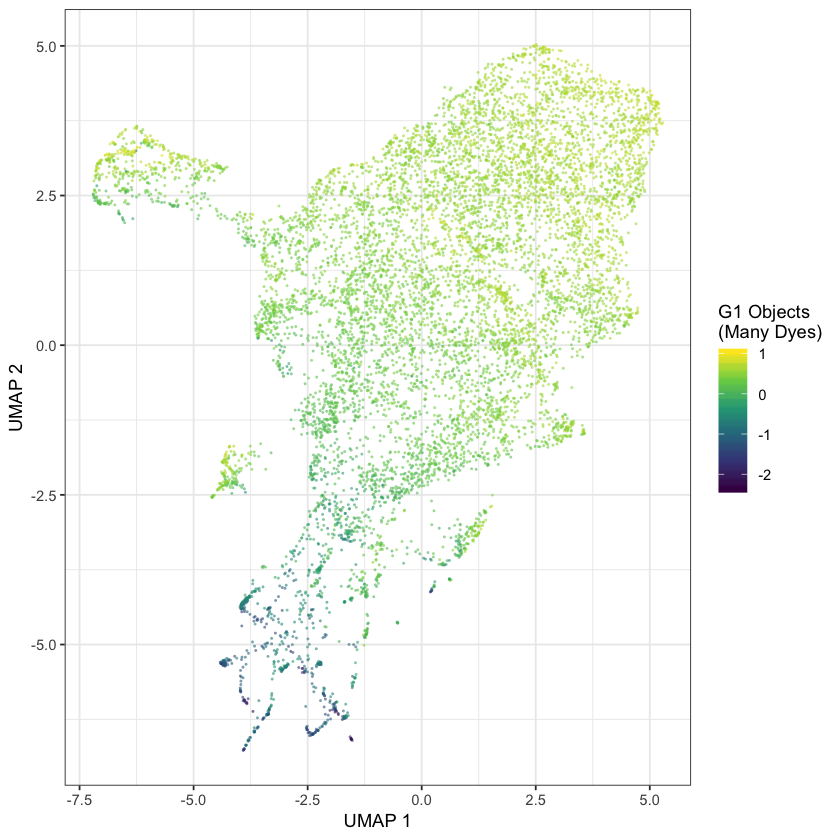

In [20]:
visualize_model(target_variable = "cc_g1_n_objects",
                title = "G1 Objects\n(Many Dyes)")

## Predicting EdU positive intensity

In [21]:
map_df %>% filter(original_name == "edu positive - Intensity Nucleus Alexa 647 Sum - Sum per Well")

original_name                                                
1 edu positive - Intensity Nucleus Alexa 647 Sum - Sum per Well
  updated_name                                   feature_type measurement
1 cc_edu_pos_alexa647_intensity_nucleus_area_sum cell_cycle   s_arrest   
  maria_thumbs_up assay
1 0               edu  
  description                                                                    
1 In S phase cells: how much EdU was incorporated (average total signal per cell)

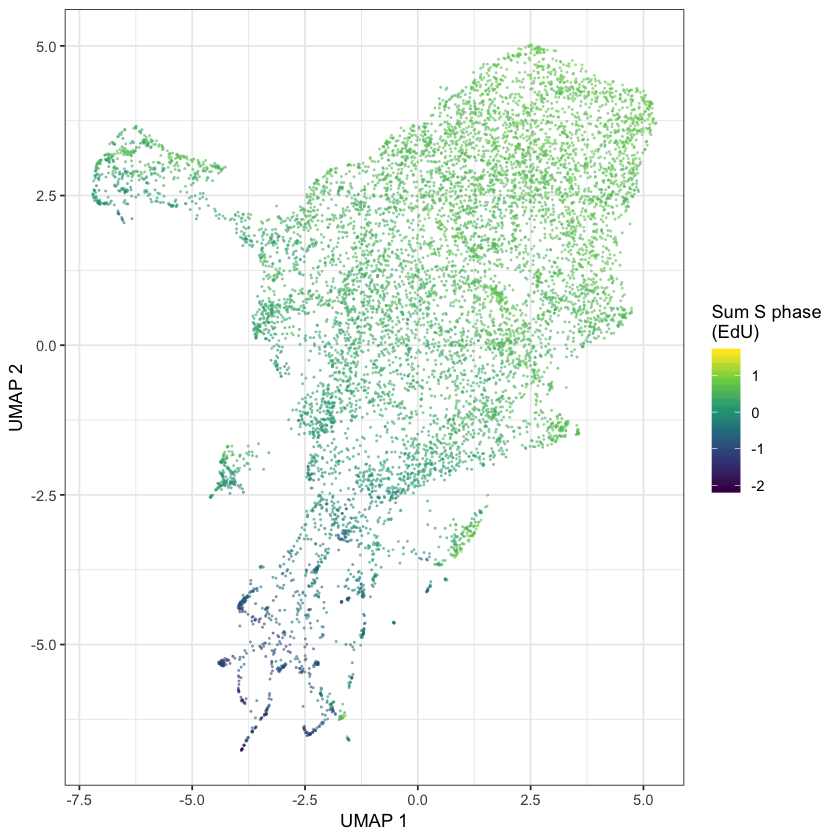

In [22]:
visualize_model(target_variable = "cc_edu_pos_alexa647_intensity_nucleus_area_sum",
                title = "Sum S phase\n(EdU)")

## Predicting Numbe of EdU positive objects

In [23]:
map_df %>% filter(original_name == "edu positive - Number of Objects")

original_name                    updated_name         feature_type
1 edu positive - Number of Objects cc_edu_pos_n_objects cell_cycle  
  measurement maria_thumbs_up assay description            
1 NA          0               edu   number of S-phase cells

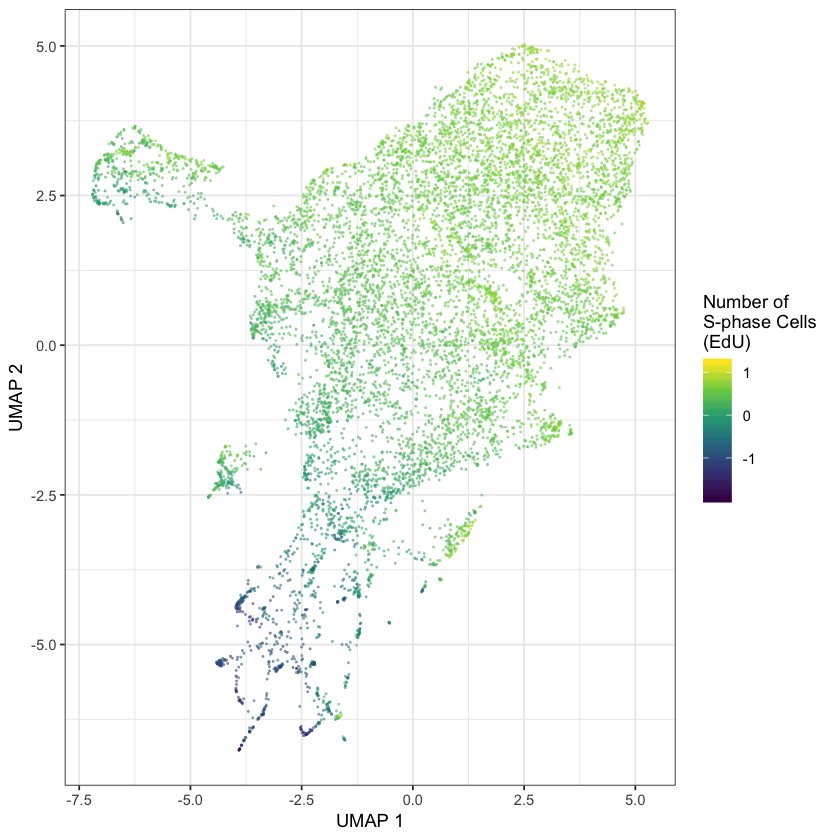

In [24]:
visualize_model(target_variable = "cc_edu_pos_n_objects",
                title = "Number of\nS-phase Cells\n(EdU)")

## Predicting ROS (Caspase)

In [25]:
map_df %>% filter(original_name == "ROS-back Mean")

original_name updated_name     feature_type measurement maria_thumbs_up
1 ROS-back Mean vb_ros_back_mean viability    NA          0              
  assay   description
1 caspase Background

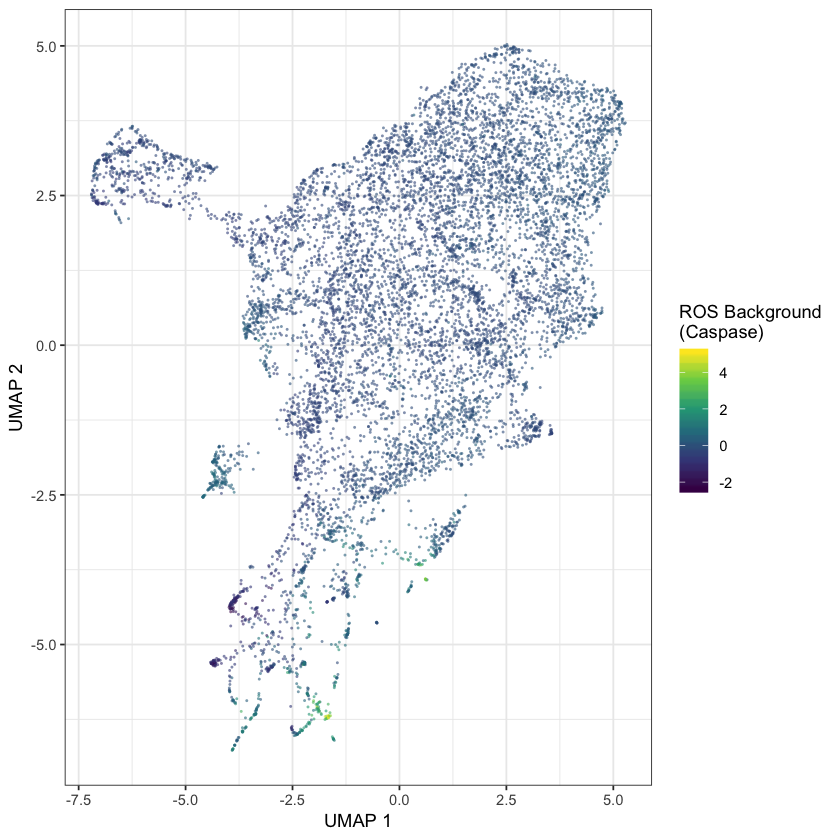

In [26]:
visualize_model(target_variable = "vb_ros_back_mean",
                title = "ROS Background\n(Caspase)")

## Visualize All Cell Health Variables

In [27]:
cell_health_variables <- colnames(
    cp_embedding_df %>%
        dplyr::select(starts_with("cc"), starts_with("vb"))
    )

length(cell_health_variables)

[1] 70

In [28]:
pdf_file <- file.path("figures", "repurposing_hub_umaps_consensus.pdf")
pdf(pdf_file, width = 5, height = 5, onefile = TRUE)

for (cell_health_variable in cell_health_variables) {
    umap_gg <- visualize_model(target_variable = cell_health_variable,
                               title = "Prediction",
                               save_figure = FALSE)
    
    print(umap_gg)
}

dev.off()

pdf 
  2